#INTRODUCCIÓN A PYTORCH

### Sesión 1  

Contenido:
* Tensores
* Manejo de tensores
* Operaciones con tensores
* Autogradiente
* Optimización durante el entrenamiento de algún modelo
* Ejemplo 1: Regresión Logística


**Instalación**:https://pytorch.org/get-started/locally/

# Tensores

In [1]:
import torch

El tipo de variable más básico de la librería es el tensor. En pytorch, todo está basado en tensores. Un tensor puede tener diferentes dimensiones, puede ser 1d, 2d, 3d, 4d, etc.

`torch.tensor(data, dtype=None, device=None, requires_grad=False)`

**Parameters:**

* `data` (`array_like`): los datos para el tensor
* `dtype` (`torch.dtype`): el tipo de dato del tensor. Cuando es `None` infiere el tipo de dato. Otros tipos pueden ser: `torch.int`, `torch.float`, `torch.double`, etc...
* `device` (`torch.device`): el dispositivo donde el tensor se va a almacenar (CPU o GPU).
* `requires_grad` (`bool`): si el autogradiente debe acumular operaciones con el tensor.

**Returns:**

* torch.Tensor

In [ ]:
# Tensor Escalar

print('\nINICIALIZADO')
x = torch.tensor(1.0)
print('Tensor:', x, '\nshape:', x.shape, '\ndtype:', x.dtype, '\ndevice:', x.device, '\nrequires_grad:', x.requires_grad)


INICIALIZADO
Tensor: tensor(1.) 
shape: torch.Size([]) 
dtype: torch.float32 
device: cpu 
requires_grad: False


In [ ]:
# Lista

print('SIN INICIALIZAR')
x = torch.empty(3) # vector, 1D
print('Tensor:', x, '\nshape:', x.shape, '\ndtype:', x.dtype, '\ndevice:', x.device, '\nrequires_grad:', x.requires_grad)

print('\nINICIALIZADO')
x = torch.tensor([1,2,3])
print('Tensor:', x, '\nshape:', x.shape, '\ndtype:', x.dtype, '\ndevice:', x.device, '\nrequires_grad:', x.requires_grad)

SIN INICIALIZAR
Tensor: tensor([-2.3254e-05,  3.1480e-41, -2.3207e-05]) 
shape: torch.Size([3]) 
dtype: torch.float32 
device: cpu 
requires_grad: False

INICIALIZADO
Tensor: tensor([1, 2, 3]) 
shape: torch.Size([3]) 
dtype: torch.int64 
device: cpu 
requires_grad: False


In [3]:
# Matriz

print('SIN INICIALIZAR')
x = torch.empty(2,3)
print(x)
print(x.shape)

print('\nINICIALIZADO')
x = torch.tensor([[1,2,3],
                  [4,5,6]])
print(x)
print(x.shape)

SIN INICIALIZAR
tensor([[2.1707e-18, 7.0952e+22, 1.7748e+28],
        [1.8176e+31, 7.2708e+31, 5.0778e+31]])
torch.Size([2, 3])

INICIALIZADO
tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])


In [ ]:
# Tensor, 3 dimensiones
x = torch.empty(2,2,3)
print(x)

tensor([[[-2.7040e+07,  3.1484e-41, -2.0594e-08],
         [ 3.1480e-41,  0.0000e+00,  1.1755e-38]],

        [[-2.0594e-08,  3.1480e-41,  2.0000e+00],
         [ 0.0000e+00,  1.7347e-18,  0.0000e+00]]])


In [ ]:
# Numpy array

import numpy as np

x = torch.tensor(np.zeros((2,2,2)))
print(x)

a = np.zeros((2,2,2))
x = torch.from_numpy(a)
print(x)

tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]], dtype=torch.float64)
tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]], dtype=torch.float64)


In [ ]:
# Otras inicializaciones

print("Aleatorio")
x = torch.rand(5, 3) # torch.rand(size)
print(x)

print("Tensor con ceros")
x = torch.zeros(5, 3)
print(x)

print("Tensor con unos")
x = torch.ones(5, 3, 1)
print(x)

Aleatorio
tensor([[0.7901, 0.2855, 0.4613],
        [0.6088, 0.4174, 0.2413],
        [0.7654, 0.0757, 0.1759],
        [0.7412, 0.5980, 0.8185],
        [0.1009, 0.6727, 0.6542]])
Tensor con ceros
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
Tensor con unos
tensor([[[1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.]]])


## Manejo de tensores

In [ ]:
# Slicing
x = torch.rand(5,3)
print(x)
print(x[:, 0])
print(x[1, :])
print(x[1,1])

# Obtener el valor si solo hay un elemento en el tensor
print(x[1,1].item())

tensor([[0.2081, 0.7382, 0.2948],
        [0.3076, 0.7349, 0.5252],
        [0.8045, 0.7692, 0.5562],
        [0.7235, 0.6615, 0.2222],
        [0.5747, 0.0781, 0.5640]])
tensor([0.2081, 0.3076, 0.8045, 0.7235, 0.5747])
tensor([0.3076, 0.7349, 0.5252])
tensor(0.7349)
0.7348912954330444


In [ ]:
# Reshape con torch.view()
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # Con -1, pytorch determina la dimensión con base en el tamaño, automáticamente.
w = x.view(2,2,-1)
print(x.size(), y.size(), z.size(), w.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8]) torch.Size([2, 2, 4])


In [ ]:
# De torch.tensor a numpy.array
a = torch.ones(5)
print(a)
b = a.numpy() # <----
print(b)
print(type(b))

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [6]:
# CPU o GPU
# Por default, todos los tensores son creados en CPU
# Si está disponible, podemos moverlos a GPU

if torch.cuda.is_available():
    device = torch.device("cuda:0")          # CUDA device object
    print(device)

    y = torch.ones_like(x, device=device)  # Crear tensor en GPU
    x = x.to(device)
    z = x + y
    # z = z.numpy()    # error porque numpy no soporta tensores en GPU
    z = z.to("cpu")       # mover a cpu
    z = z.numpy()

cuda:0


In [ ]:

# tensor que se guarda en RAM
x = torch.tensor(np.zeros((10000, 10000)))

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('device:', device,
      '\nnumber of gpus:', torch.cuda.device_count(),
      '\nname of gpu:', torch.cuda.get_device_name(0))
print('consumo de VRAM:', round(torch.cuda.memory_allocated(0)/1024**3, 1), 'GB')

device: cuda:0 
number of gpus: 1 
name of gpu: Tesla T4
consumo de VRAM: 0.0 GB


## Operaciones con tensores

In [ ]:
A = torch.tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9]], dtype = torch.float64)

print(A)

B = torch.tensor([[1,0,0],
                  [0,1,0],
                  [0,0,1]], dtype = torch.float64)

print(B)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], dtype=torch.float64)


In [ ]:
print('A+B =', A+B, '\n')
print('A*B =', A*B, '\n')
print('AB =', torch.matmul(A,B), '\n')
print('A^2 =', A**2, '\n')
print('A^T =', torch.transpose(A, 0, 1), '\n')

A+B = tensor([[ 2.,  2.,  3.],
        [ 4.,  6.,  6.],
        [ 7.,  8., 10.]], dtype=torch.float64) 

A*B = tensor([[1., 0., 0.],
        [0., 5., 0.],
        [0., 0., 9.]], dtype=torch.float64) 

AB = tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64) 

A^2 = tensor([[ 1.,  4.,  9.],
        [16., 25., 36.],
        [49., 64., 81.]], dtype=torch.float64) 

A^T = tensor([[1., 4., 7.],
        [2., 5., 8.],
        [3., 6., 9.]], dtype=torch.float64) 



## Autogradiente

Con el parámetro ***requires_grad*** se le señala a pytorch que se requerirá calcular gradientes para ese tensor en particular. Es decir, se señala la variable que se quiere optimizar en algún modelo. Provee de diferenciación automática para todas las operaciones en el tensor.

In [ ]:
x = torch.tensor([5.5, 3], requires_grad=True)  # requires_grad = True -> registra todas las operaciones en el tensor



Dada la función

$ y = f(a,x,b) = ax^2 + b $,

sus derivadas parciales y gradiente son

$ \dfrac{dy}{da} = x^2, \quad \dfrac{dy}{dx} = 2ax, \quad \dfrac{dy}{db} = 1, \quad \nabla y(a,x,b) = (x^2,2ax,1)  $

así que evaluando el gradiente en el punto (2,1,1) se tiene que

$ \nabla y(2,1,1) = (1,4,1)  $

**Vamos a calcular este gradiente de forma numérica utilizando el autograd de PyTorch.**

In [ ]:
a = torch.tensor(2, dtype = torch.float64, requires_grad = False)
x = torch.tensor(1, dtype = torch.float64, requires_grad = True)
b = torch.tensor(1, dtype = torch.float64, requires_grad = False)


y = a*x**2 + b # La variable "y" fue creada como resultado de una operación con "x", por lo que "y" contiene un atributo grad_fn.
               # (grad_fn hace referencia a una función que ha creado el tensor)

print(x)
print(x.grad_fn) # creada por el usuario -> grad_fn = None
print(y)
print(y.grad_fn)

tensor(1., dtype=torch.float64, requires_grad=True)
None
tensor(3., dtype=torch.float64, grad_fn=<AddBackward0>)


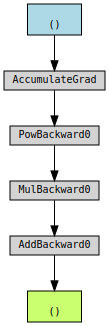

In [ ]:
! pip install torchviz
from torchviz import make_dot

make_dot(y)

Calculemos los gradientes con backpropagation:



*   Al terminar todas las operaciones que se le aplicarán al tensor, se puede llamar al método .backward(), que calculará todos los gradientes automáticamente.
*   La derivada parcial de la función con respecto al tensor se acumulará en el atributo .grad

In [ ]:
y.backward()
print('dy/dx = ', x.grad)

dy/dx =  tensor(4., dtype=torch.float64)


In [ ]:
print('dy/da = ', a.grad)
print('dy/db = ', b.grad)

dy/da =  None
dy/db =  None


### Optimización durante el entrenamiento de algún modelo

Durante el ciclo de entrenamiento, se realizan operaciones con los pesos del modelo y después se requiere **actualizar** los pesos calculados (optimización). Esta operación de actualización de pesos **no debe acumularse** en el gradiente. Para solucionarlo, existen varias alternativas:

*  x.requires_grad_(False) $ \quad$  ----> cambia la bandera existente 'in-place'
*  x.detach()             $ \quad$ ----> obtener un nuevo tensor con el mismo contenido pero sin cálculos de gradiente.
*  with torch.no_grad():   $ \quad$----> envolver instrucciones en 'with torch.no_grad():'


Además, .backward() acumula el gradiente para el tensor en el atributo .grad, por lo que se debe ser cuidadoso durante la optimización.

Se utiliza
> .zero_()

para **vaciar la acumulación del gradiente** antes de un nuevo paso de optimización.

In [ ]:
# Ejemplo dummy

weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    model_output = (3*weights**2).sum() # Operaciones
    model_output.backward()

    print(f"weights - epoch {epoch}: {weights.grad}")

    # Optimizar modelo, actualizar pesos. (En la práctica, estos pasos se suelen hacer automaticamente por medio de implementaciones en la librería)
    with torch.no_grad():
        weights -= 0.1 * weights.grad

    # Vaciar gradiente
    weights.grad.zero_()

print(weights)
print(model_output)
print(weights.grad)

weights - epoch 0: tensor([6., 6., 6., 6.])
weights - epoch 1: tensor([2.4000, 2.4000, 2.4000, 2.4000])
weights - epoch 2: tensor([0.9600, 0.9600, 0.9600, 0.9600])
tensor([0.0640, 0.0640, 0.0640, 0.0640], requires_grad=True)
tensor(0.3072, grad_fn=<SumBackward0>)
tensor([0., 0., 0., 0.])


Los algoritmos de optimización implementados en la librería (ejemplo: torch.optim.SGD) incluyen el método zero_grad() para reiniciar la acumulación de gradientes:

In [ ]:
# Optimizador SGD
optimizer = torch.optim.SGD([weights], lr=0.1)
# Durante el entrenamiento:
model_output = (3*weights**2).sum()
model_output.backward()
optimizer.step()  # <-------

print("weights.grad, antes de reiniciar acumulacion de grad: ", weights.grad)

optimizer.zero_grad() # <-------


print('\nweights: ', weights)
print('\nmodel_output: ', model_output)
print("\nweights.grad, después de reiniciar acumulacion de grad: ", weights.grad)

weights.grad, antes de reiniciar acumulacion de grad:  tensor([0.0016, 0.0016, 0.0016, 0.0016])

weights:  tensor([0.0001, 0.0001, 0.0001, 0.0001], requires_grad=True)

model_output:  tensor(8.2463e-07, grad_fn=<SumBackward0>)

weights.grad, después de reiniciar acumulacion de grad:  None


# Ejemplo 1: Regresión logística

0) Preparar datos  
1) Definir modelo  
2) Función de pérdida (loss) y optimizador  
3) Ciclo de entrenamiento  
4) Evaluación del modelo

In [ ]:
#### EJERCICIO DE CÓDIGO PARA LA AYUDANTÍA #####

# COMPLETAR EL CÓDIGO

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0) Preparar datos
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Array a Tensor



# Cambiar dimensión


# 1) Definir modelo
#  lineal: f = wx + b , sigmoide al final
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_features)

# 2) Función de pérdida (loss) y optimizador
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Ciclo de entrenamiento
for epoch in range(num_epochs):
    # Forward pass


    # Loss


    # Backward pass


    # Update


    # ?



    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


# 4) Evaluación del modelo




In [1]:
#### CÓDIGO SOLUCIÓN DEL EJERCICIO ANTERIOR ######

import torch
import torch.nn as nn # Siguiente ayudantía comentamos sobre torch.nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0) Preparar datos
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Array a Tensor
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# Cambiar dimensión
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)


# 1) Definir modelo
#  lineal: f = wx + b , sigmoide al final
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1) # Capa lineal, equivalente a hacer f = wx + b

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x)) # Aplica función sigmoide y regresa solución y_pred
        return y_pred

model = Model(n_features)

# 2) Función de pérdida (loss) y optimizador
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Ciclo de entrenamiento
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X_train) # Observar que no se llama a la función forward.

    # Loss
    loss = criterion(y_pred, y_train)

    # Backward pass
    loss.backward()

    # Update
    optimizer.step()

    # Zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# 4) Evaluación del modelo
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

epoch: 10, loss = 0.4409
epoch: 20, loss = 0.3901
epoch: 30, loss = 0.3531
epoch: 40, loss = 0.3247
epoch: 50, loss = 0.3021
epoch: 60, loss = 0.2837
epoch: 70, loss = 0.2683
epoch: 80, loss = 0.2552
epoch: 90, loss = 0.2439
epoch: 100, loss = 0.2340
accuracy: 0.9035
